In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_excel("merc.xlsx")

In [145]:
#Veriyi anlamak
df.describe() #istatistik detaylara bakalım
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [146]:
#Boş veri var mı
df.isnull().sum() #null değer yok

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 800x600 with 0 Axes>

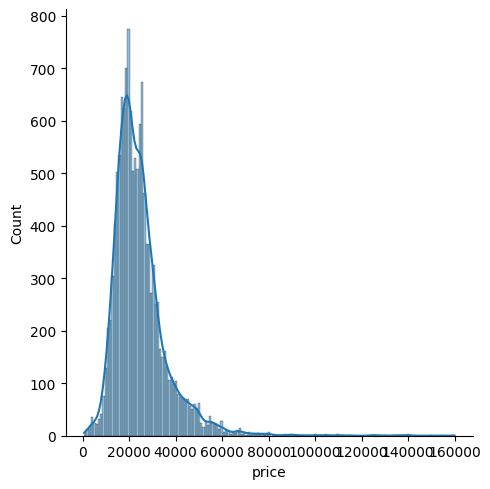

In [147]:
#Grafiksel analizler
plt.figure(figsize=(8,6))
sns.displot(x="price",data=df,kde=True) 
#grafiğin sağ tarafında, normal grafiği bozan değerler var
#çok yüksek fiyatlı arabaları çıkartmamız iyi olur

<Axes: xlabel='year', ylabel='count'>

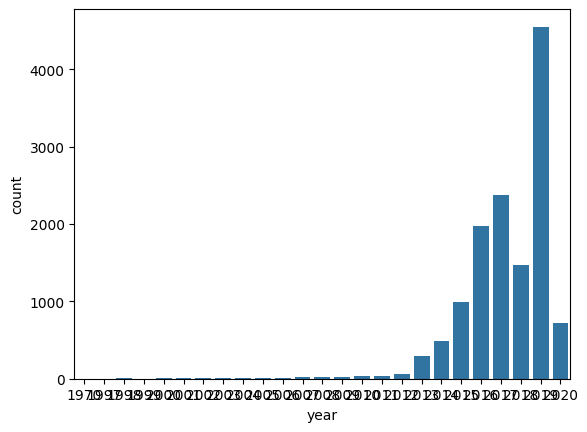

In [148]:
sns.countplot(data = df ,x ="year")
#yıllara göre araba sayısı

In [149]:
#sayısal sütunların birbiriyle korelasyonu(ilişkisi)
#[-1,1] arasında değer alır 
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [150]:
#sadece price ile alakalı ilişkilere bakmak için
df_numeric.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

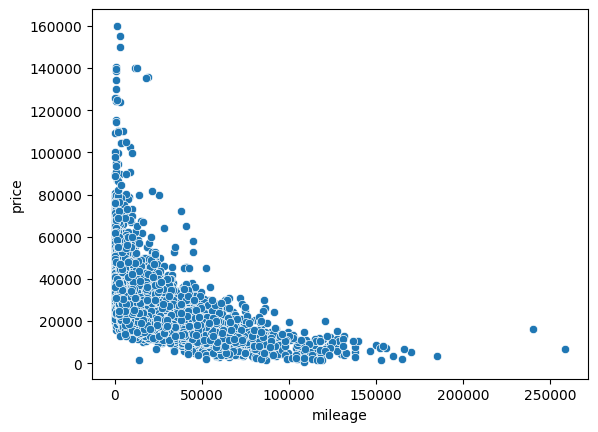

In [151]:
#En yüksek fiyatlı arabalar
sns.scatterplot(data=df , x="mileage",y="price")

In [152]:
df.sort_values("price",ascending = False).head(20) #ascending yukardan aşağı büyükten küçüğe

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [153]:
#yüksek fiyatlı arabaların df'den çıkarılması
#en yüksek fiyatlı arabaların 1000'de 1 ini çıkarttık
df_guncel = df.sort_values("price",ascending=False).iloc[131:]
df_guncel.reset_index().head(10)

,index,year,price,transmission,mileage,tax,mpg,engineSize
0,6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
1,5779,2020,65990,Semi-Auto,999,145,28.0,4.0
2,3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
3,4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
4,8814,2019,64999,Semi-Auto,119,145,40.9,3.0
5,8083,2018,64999,Semi-Auto,41102,145,23.0,5.5
6,267,2019,64998,Semi-Auto,313,145,31.4,4.7
7,2956,2020,64980,Semi-Auto,3999,145,40.4,3.0
8,2274,2020,64980,Semi-Auto,3999,145,40.4,3.0
9,12160,2018,64950,Automatic,13000,145,28.5,3.0


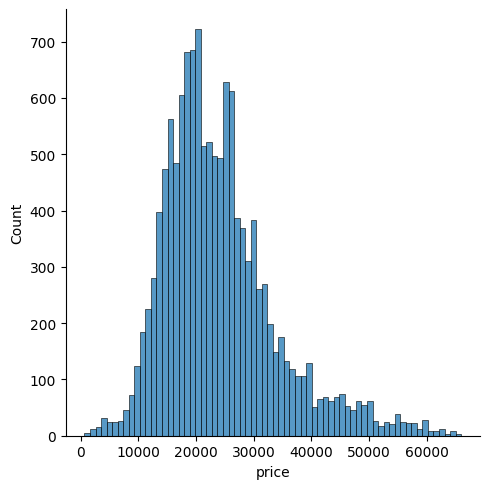

In [154]:
#price değerlerine grafikte bakalım
sns.displot(data = df_guncel ,x ="price")
#artık normal dağılıma daha yakın bir grafiğimiz var

In [155]:
#1970 yılındaki araba fiyatlarında büyük bir anormallik var
df_guncel.groupby("year")["price"].sum()
df_guncel = df_guncel[df_guncel.year != 1970]
#1970 yılını veri setimizden attık (tercih meselesi)
df_guncel.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [156]:
#son işlem ise transmission sütunu bunu istersek 0 ve 1 olarak değiştirebiliriz
#fakat burada sonuçlarımız üzerinde etkisi istediğimiz gibi olmayabilir bu yüzden çıkaralım
df_guncel.drop("transmission",axis=1,inplace=True)
df_guncel.head()
#tranmission sütununu attık ve verimiz işlenmeye hazır hale geldi
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [157]:
df_guncel_2 = df_guncel.copy()
#X ve y değerlerine ulaşmak
y = df_guncel_2["price"].values
df_guncel_2.drop("price",axis=1,inplace=True)
X = df_guncel_2.values

In [158]:
#train ve test olarak verileri ayırma
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [159]:
#Değerleri [0-1] arasına normalizasyon yaptık
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.fit_transform(X_test)

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [198]:
#katmanları minimum feature sayısı kadar koymalıyız
model = Sequential()
#4 tane ara katman ekledik her birinde 12 nöron olacak
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
#bir tanede çıkış katmadı
model.add(Dense(1))
#loss function için en iyi açlışan algoritma adam algoritmasıdır
model.compile(optimizer="adam",loss = "mse")
#test ve train kısmı için manuel olarak doğrulama kayıplarına bakmamız gerekmiyor 


In [222]:
#modelin eğitilmesi kısmı
#burada (tuple içine) validation Eğitim sırasında modelin performansını değerlendirmek için kullanılacak doğrulama (validation) verileridir.
#batch size ise Modelin her adımda kaç örneği işlediğini belirler. Eğitim verileri, bu boyuttaki küçük parçalara bölünür ve her parça üzerinde model güncellemeleri yapılır.
#epoch çok fazla verirsek overfitting(ezberleme) problemi olabiliyor 
model.fit(scale_X_train,y_train,validation_data = (scale_X_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19174080.0000 - val_loss: 23381280.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19060330.0000 - val_loss: 22639690.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18888034.0000 - val_loss: 23190466.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18743704.0000 - val_loss: 22563870.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18733134.0000 - val_loss: 22864108.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18700918.0000 - val_loss: 23284008.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19436194.0000 - val_loss: 22617254.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18373278.0000 - val_loss: 22157704.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18675888.0000 - val_loss: 22438826.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18703872.0000 - val_loss: 22474424.0000
Epoch 11/

In [216]:
#burada hem loss hem de val_loss'a bakabiliyoruz
lossData = pd.DataFrame(model.history.history)
lossData

,loss,val_loss
0,672146368.0,688100544.0
1,672111488.0,688036544.0
2,671992320.0,687821504.0
3,671598336.0,687121600.0
4,670384832.0,685084416.0
...,...,...
295,18929992.0,22597910.0
296,18902364.0,22640186.0
297,18884296.0,23029324.0
298,18885536.0,22491880.0


<Axes: >

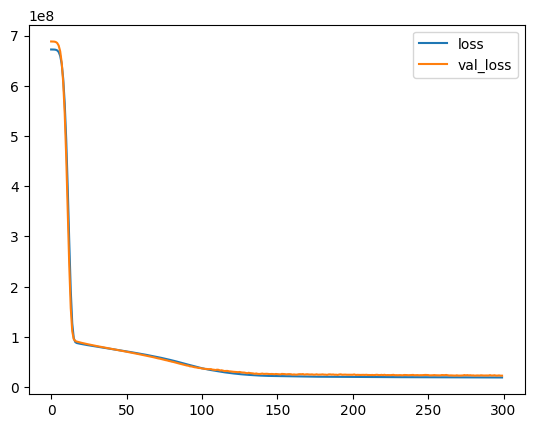

In [220]:
#görselleştirelim farkı
lossData.plot() #neredeyse tamamen aynı ve sürekli azaldığını görebiliyoruz

In [224]:
from sklearn.metrics import mean_absolute_error,mean_absolute_error

In [230]:
predict = model.predict(scale_X_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


In [234]:
mae = mean_absolute_error(y_test,predict)
mae

3247.717025682441

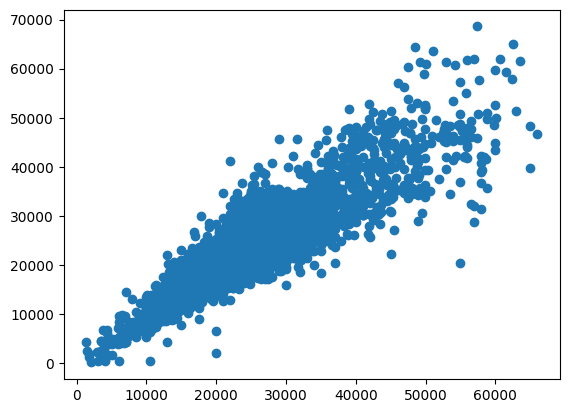

In [240]:
plt.scatter(y_test,predict) 
#hemen hemen düzgün fakat sapmalar var eğer bizim için yeterli değilse
#yaptığımız işlemlerde değişiklik yapabiliriz ,şu ana kadar yaptığımız kısımda %13 lük bir sapma mevcut